In [12]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [13]:
df = pd.read_csv("../data/dataset.csv").drop(columns=["Unnamed: 0"])
n_diagnoses = df.primary_diagnosis.nunique()
X = df[["l0", "l1", "l2", "l3"]]

In [14]:
cluster_id = KMeans(n_clusters=n_diagnoses, random_state=0).fit_predict(X)
cluster_id = [str(i) for i in cluster_id]
pca = PCA(n_components=2).fit_transform(X)
pca_1, pca_2 = pca[:,0], pca[:,1]
df = df.assign(cluster_id=cluster_id, pca_1=pca_1, pca_2=pca_2)

In [15]:
df.head()

,prefix,primary_diagnosis,days_to_death,case_id,img_fp,l0,l1,l2,l3,cluster_id,pca_1,pca_2
0,TCGA-YL-A8SH,"Adenocarcinoma, NOS",875.0,bfb973eb-d42d-4900-a606-a381d2317555,TCGA-YL-A8SH-01Z-00-DX2.2B25B4BE-0236-44E4-A04...,0.479840,1.221100,0.631098,0.740487,0,-0.116056,-0.355757
1,TCGA-CJ-5679,"Clear cell adenocarcinoma, NOS",679.0,3fa6c93e-e7fe-402c-9526-c81411aa0920,TCGA-CJ-5679-01Z-00-DX1.659CD853-BC8A-474D-9EE...,0.632034,0.632034,0.981619,1.039226,2,0.310956,0.243598
2,TCGA-B0-5088,"Clear cell adenocarcinoma, NOS",563.0,0022478c-4dfd-4cbe-a05e-fb20310844e3,TCGA-B0-5088-01Z-00-DX1.69bb79f8-33cc-4c9c-be6...,1.209505,1.093733,1.121510,1.303979,5,0.911711,-0.280997
3,TCGA-B8-4143,"Clear cell adenocarcinoma, NOS",709.0,dfa9513d-4e09-405b-a80f-2987ec5c5263,TCGA-B8-4143-01Z-00-DX1.44100402-0862-4e68-83f...,0.709068,0.674646,0.953074,0.810293,2,0.271985,0.196638
4,TCGA-55-A490,"Adenocarcinoma, NOS",99.0,b89de053-d253-447f-952e-9a2edcf6bca5,TCGA-55-A490-01Z-00-DX1.07D77502-7216-4C23-9BB...,1.010598,0.724026,0.856795,0.886262,2,0.484621,0.056095


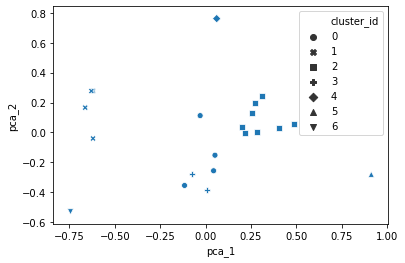

In [16]:
sns.scatterplot(x=df.pca_1, y=df.pca_2, style=df.cluster_id)